<a href="https://colab.research.google.com/github/hasansin/Data-Mining/blob/master/Data_Mining_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regression**

### **1. Perform EDA (Explotary Data Analysis)**



In [ ]:
!pip install category_encoders

**1. Load dataset**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv('/content/ds_salaries.csv')

**2. Dimension of the dataset**

---

In [ ]:
data.shape

(3755, 11)

**3. First fifteen records of dataset**

---

In [ ]:
data.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200.0,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000.0,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000.0,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000.0,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100.0,USD,147100,US,0,US,M


**4. Last fifteen records of the dataset**

---

In [ ]:
data.tail(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3740,2020,SE,FT,Data Science Manager,190200.0,USD,190200,US,100,US,M
3741,2020,MI,FT,Data Scientist,118000.0,USD,118000,US,100,US,M
3742,2020,MI,FT,Data Scientist,138350.0,USD,138350,US,100,US,M
3743,2020,MI,FT,Data Engineer,130800.0,USD,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,40000.0,EUR,45618,HR,100,HR,S
3745,2021,SE,FT,Director of Data Science,168000.0,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000.0,SGD,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000.0,USD,423000,US,50,US,L
3748,2021,MI,FT,Data Engineer,24000.0,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000.0,USD,165000,US,100,US,L


**5. Summary statistics of dataset**

---



In [ ]:
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3752,3752,3750,3.751000e+03,3755,3755.000000,3754,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2513,3715,1037,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.903735e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716076e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


**6. Check if null values exist in each column**

---

In [ ]:
data.isnull().sum()

,0
work_year,0
experience_level,3
employment_type,3
job_title,5
salary,4
salary_currency,0
salary_in_usd,0
employee_residence,1
remote_ratio,0
company_location,0


7.

In [ ]:
def formatTitle(titleData):
  ttl = titleData.split('_')
  if len(ttl) == 2:
    return ttl[0].capitalize() + ' ' + ttl[1].capitalize()

  elif len(ttl) == 3:
    return ttl[0].capitalize() + ' ' + ttl[1].capitalize() + ' ' + ttl[2].capitalize()

  elif len(ttl) == 1:
    return ttl[0].capitalize()



**7. Top 10 Highest Paying Data Science Roles**


---






<ipython-input-116-b8fa89caf977>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index, palette="viridis")


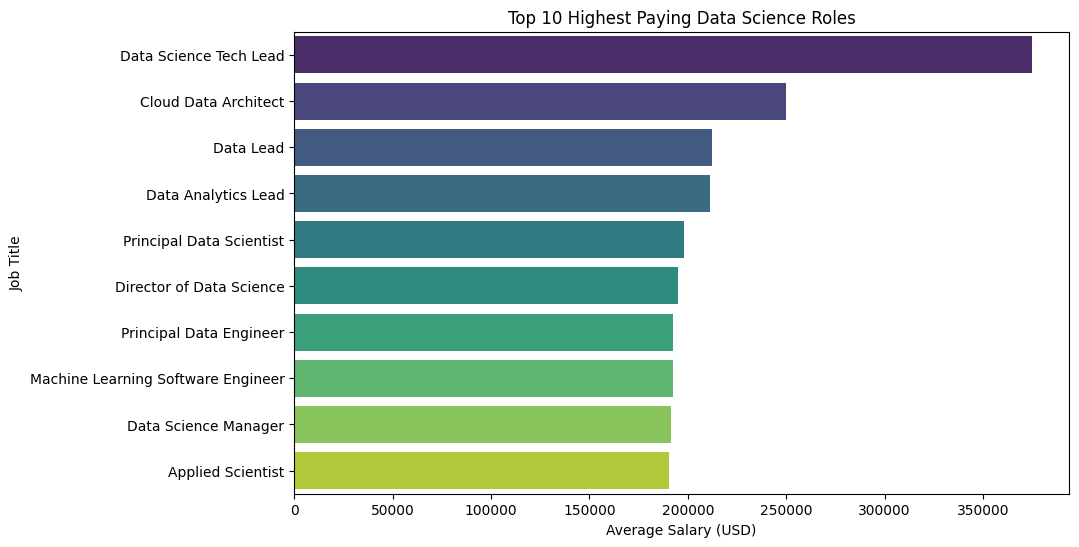

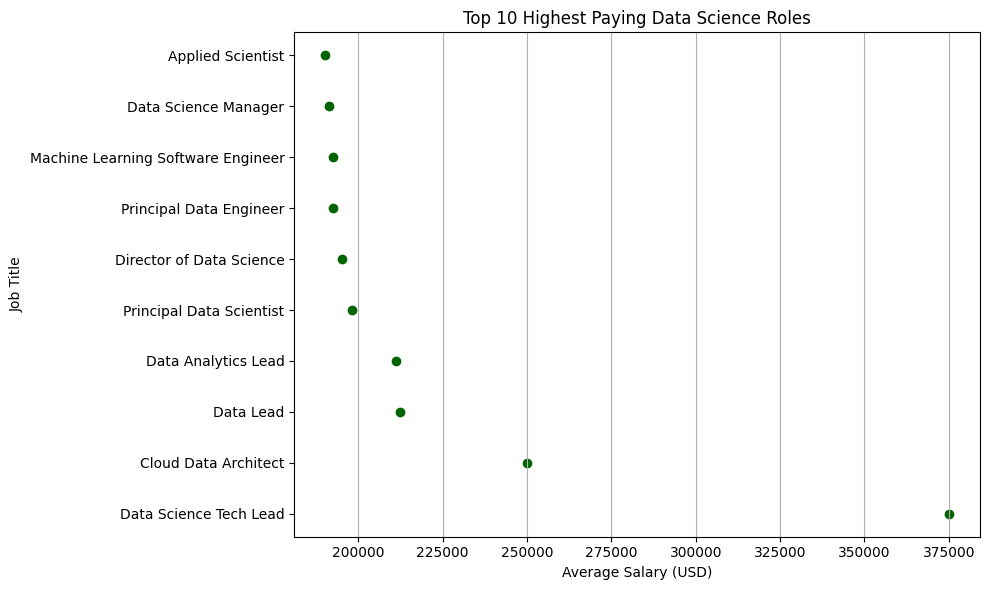

In [ ]:
plt.figure(figsize=(10, 6))
job_salary = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=job_salary.values, y=job_salary.index, palette="viridis")
plt.title('Top 10 Highest Paying Data Science Roles')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.show()

print("\n\n")
plt.figure(figsize=(10, 6))
plt.scatter(job_salary.values, job_salary.index, color='darkgreen')
plt.title('Top 10 Highest Paying Data Science Roles')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

**8. Average Salary by Remote Work Ratio**


---



<ipython-input-117-6d43f8a28164>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_salary.index, y=remote_salary.values, palette="viridis")


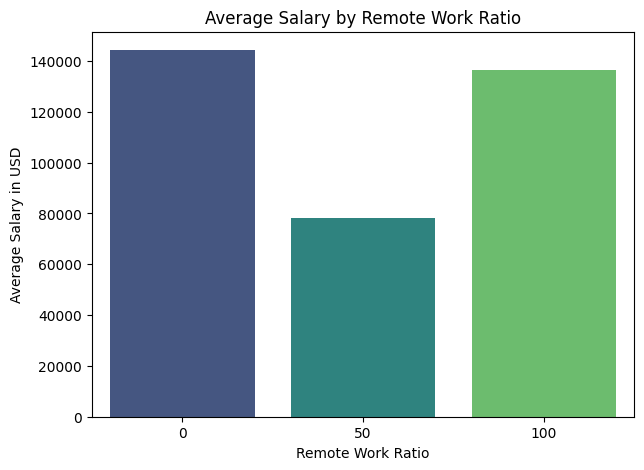

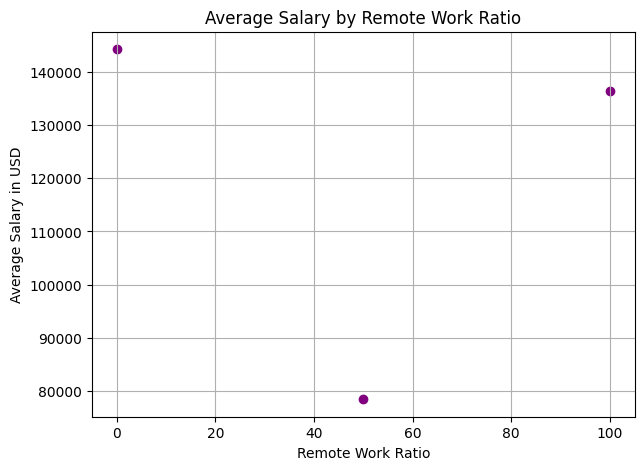

In [ ]:
plt.figure(figsize=(7, 5))
remote_salary = data.groupby('remote_ratio')['salary_in_usd'].mean()
sns.barplot(x=remote_salary.index, y=remote_salary.values, palette="viridis")
plt.title('Average Salary by Remote Work Ratio')
plt.xlabel('Remote Work Ratio')
plt.ylabel('Average Salary in USD')
plt.show()
print("\n\n")
plt.figure(figsize=(7, 5))
plt.scatter(remote_salary.index, remote_salary.values, color='purple')  # you can customize color
plt.title('Average Salary by Remote Work Ratio')
plt.xlabel('Remote Work Ratio')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()


**9. Experience Level vs Salary**


---



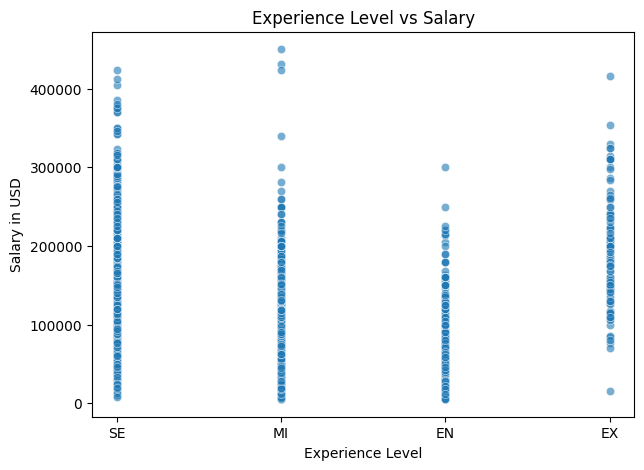

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data['experience_level'], y=data['salary_in_usd'], alpha=0.6)
plt.title('Experience Level vs Salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


**10. Feature Correlation Matrix - numerical data**

---

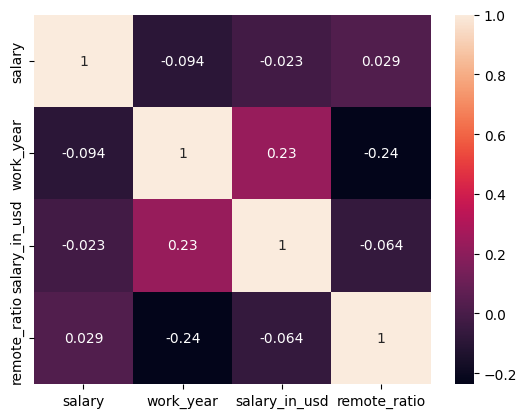

In [ ]:
# Selecting only numeric columns for correlation calculation
numeric_data = data[['salary', 'work_year', 'salary_in_usd', 'remote_ratio']]

sns.heatmap(numeric_data.corr(method='pearson'), annot=True);

plt.show()


Work_year with salary_in_usd have 0.23 positive correlation and remote_ratio with salary had 0.029 of correlation. Other than that all other combinations have negative and very lower values.

All correlation values are near zero which means there is  no meaningful linear relationship between salary_in_usd, salary and remote_ratio or work_year.



**11. Feature distribution visualization - numerical data**

---





remote ratio has only 3 ratios and it is not much related to target variable it will be selected as categorical variable.

Text(0.5, 0.98, 'Feature Distributions')

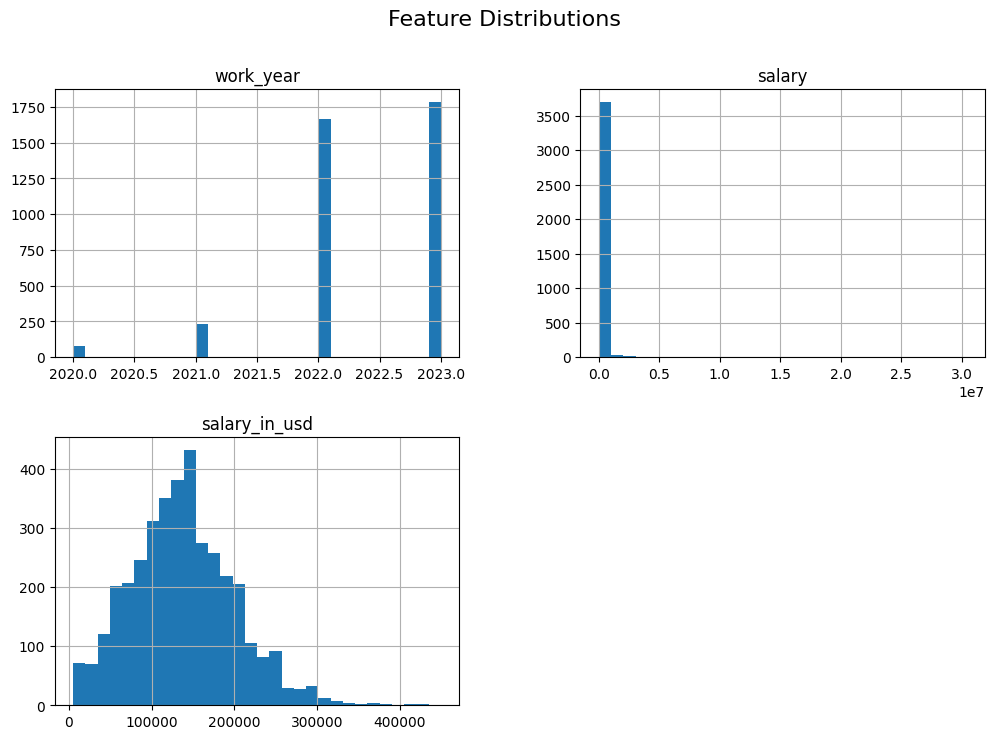

In [ ]:
#remote ratio has only 3 ratios and it is not much related to target variable it will be selected as categorical variable and adding a map to that.
data['remote_ratio'] = data['remote_ratio'].map({0: "On-Site", 50: "Hybrid", 100: "Remote"})

data.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)

**12. Feature distribution - categorical data**

---


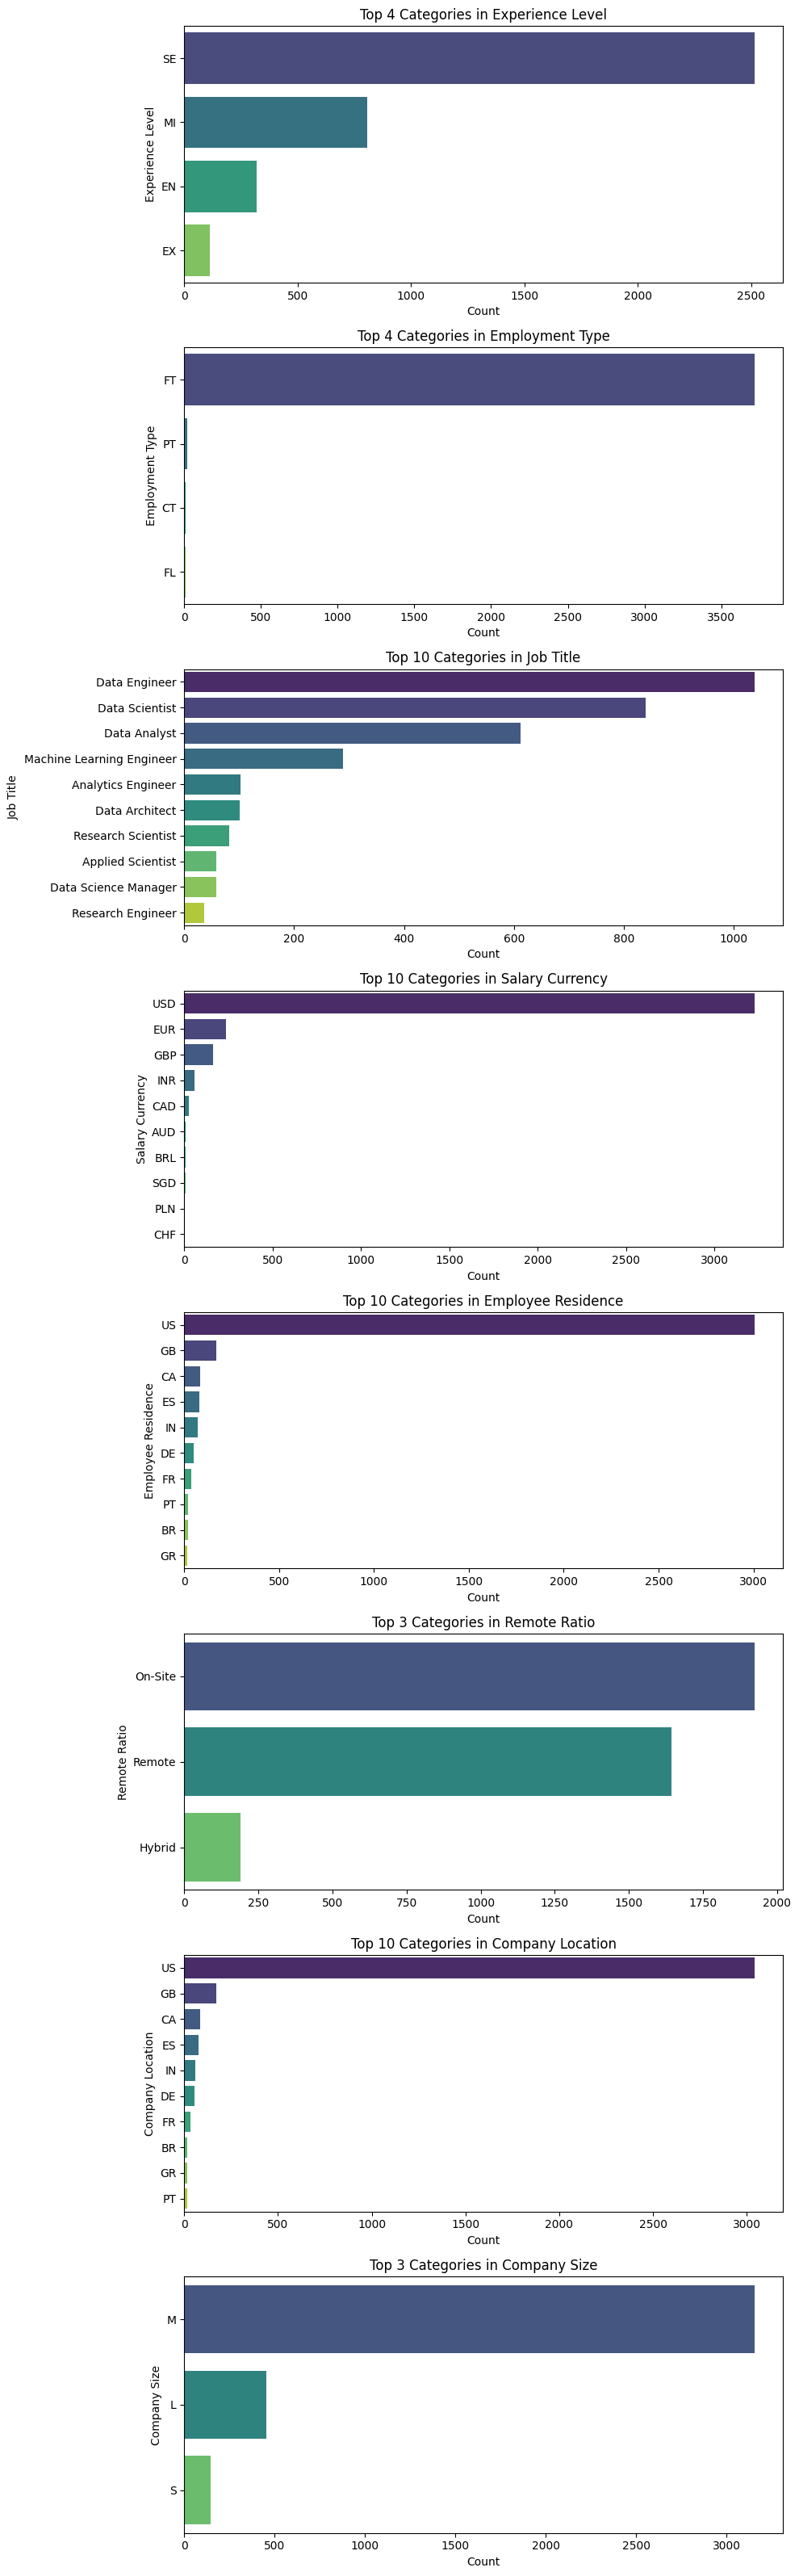

In [ ]:

# Identify categorical columns
categorical_features = data.select_dtypes(include=["object"]).columns  # Automatically detect categorical features


# Create subplots for each categorical feature
# Set up subplots dynamically based on number of categorical features
fig, axes = plt.subplots(nrows=len(categorical_features), figsize=(10, len(categorical_features) * 4))

# Loop through categorical columns and plot
for i, col in enumerate(categorical_features):
    value_counts = data[col].value_counts()  # Get category frequencies

    # If too many categories, show only top 10
    if len(value_counts) > 10:
        value_counts = value_counts[:10]  # Keep top 10 categories

    # Use barplot (horizontal) for better readability if many categories
    sns.barplot(y=value_counts.index, x=value_counts.values, ax=axes[i], hue=value_counts.index, palette="viridis", legend=False)

    axes[i].set_title(f"Top {len(value_counts)} Categories in {formatTitle(col)}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(formatTitle(col))


# Adjust layout
plt.tight_layout

plt.tight_layout()
plt.show()

### **2. Identifying required features and the output**



Since model predicting is all about predicting salary in the data science role. Having both salary and salary in usd is not necessary. The Salary features can be eliminated since the salary in USD is already there. Furthermore salary currency also can be eliminated since salary in USD already exists.  **Salary in USD column is selected as the output**.

In [ ]:
numerical_features = ["work_year"]
categorical_features = ["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size","remote_ratio"]
output = "salary_in_usd"

data = data[numerical_features + categorical_features + [output]]
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3752 non-null   object
 2   employment_type     3752 non-null   object
 3   job_title           3750 non-null   object
 4   employee_residence  3754 non-null   object
 5   company_location    3755 non-null   object
 6   company_size        3755 non-null   object
 7   remote_ratio        3755 non-null   object
 8   salary_in_usd       3755 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 264.2+ KB


### **3. Missing value imputation**

#####**3.1 Check if missing values exist in dataset**

---



In [ ]:
data.isnull().sum()

,0
work_year,0
experience_level,3
employment_type,3
job_title,5
employee_residence,1
company_location,0
company_size,0
remote_ratio,0
salary_in_usd,0


Since above table depict that only categorical data has missing values, categorical data mssing value imputation will be done in next steps.

#####**3.2  Check if mode imputation is suitable for each categorical feature**

---

<Axes: xlabel='experience_level'>

<Figure size 1000x600 with 0 Axes>

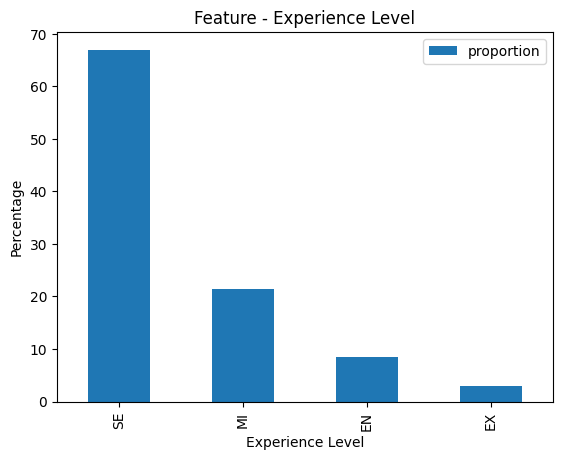

<Axes: xlabel='employment_type'>

<Figure size 1000x600 with 0 Axes>

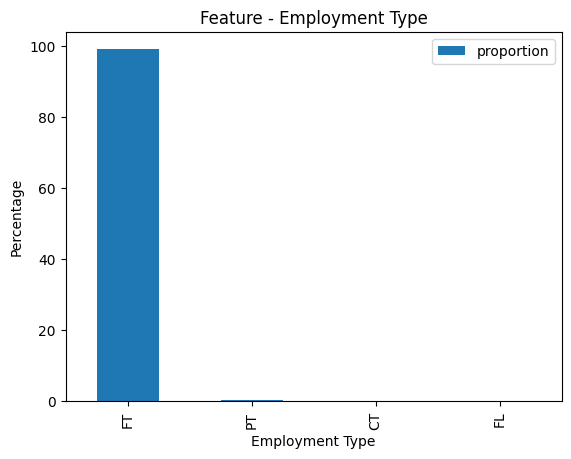

<Axes: xlabel='job_title'>

<Figure size 1000x600 with 0 Axes>

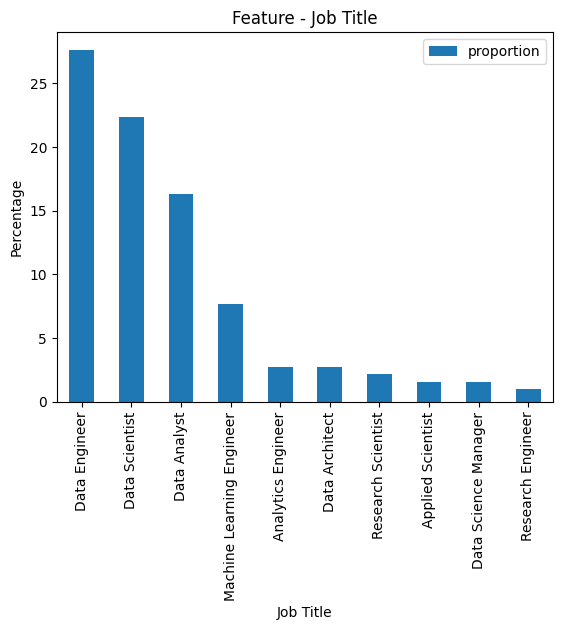

<Axes: xlabel='employee_residence'>

<Figure size 1000x600 with 0 Axes>

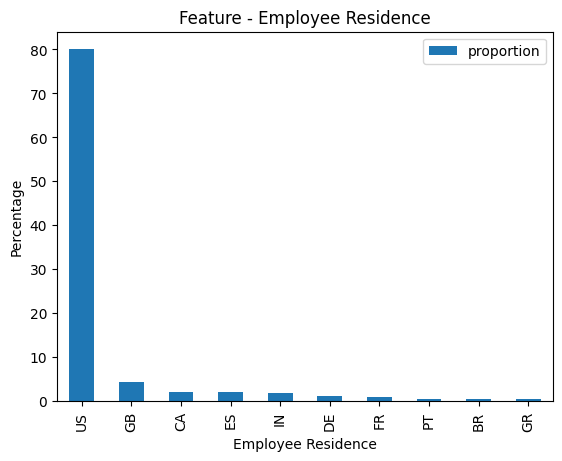

In [ ]:
#get all categorical features in to a single array
categorical_fr = ["experience_level", "employment_type", "job_title", "employee_residence"]

for col in categorical_fr:
    # Get value counts as a DataFrame
    plt.figure(figsize=(10, 6))
    value_counts =  value_counts = data[col].value_counts(normalize=True).head(10) * 100
    display(pd.DataFrame(value_counts).plot(kind='bar'))
    plt.title(f"Feature - {formatTitle(col)}")
    plt.xlabel(formatTitle(col))
    plt.ylabel('Percentage')
    plt.show()




*   As the above figures depict, the missing value for employee_residence, employment_type, and experience_level can be imputed using mode imputing since they have clear dominant categories.


*   However, since the job_title feature has many unique job titles (93)  and the highest value count percentage containing category(data engineer) is only 27.65 percent, using mode imputation for job title might cause the model to be biased toward that category.



*   Considering the above factors, missing values of the 'job_title' category will be replaced with the word Unknown instead of using mode imputation.




#####**3.3    Mode imputation for categorical data - experience_level, employment_type, employee_residence**

---

In [ ]:
#retrive all other categorical features other than job_title
mode_features = ["experience_level", "employment_type", "employee_residence"]

#iterate through each category for mode imputation
for col in mode_features:
   #Check the mode of each column
   print(f"\n\nMode of {col}: {data[col].mode()[0]}")
   #Impute the missing values with the mode
   data.loc[:, col] = data[col].fillna(data[col].mode()[0])

# Check if all missing values are handled
print(f"\n\n{data.isnull().sum()}")



Mode of experience_level: SE


Mode of employment_type: FT


Mode of employee_residence: US


work_year             0
experience_level      0
employment_type       0
job_title             5
employee_residence    0
company_location      0
company_size          0
remote_ratio          0
salary_in_usd         0
dtype: int64


#####**3.4  Add Unknown for job title missing values - job_title**

---


In [ ]:

#replace missing values of job title with word "Unknown"
data.loc[:, 'job_title'] = data['job_title'].fillna("Unknown")

# Check if all missing values are handled
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
employee_residence    0
company_location      0
company_size          0
remote_ratio          0
salary_in_usd         0
dtype: int64


### **4. Outlier detection and removal**

Since outliers are available only for numerical data, only numerical features of data set will be used for this.

#####**4.1 Visualize outliers - numerical data**

---


---------------------------------------------------------------------------------------------------


Feature - Work Year



Data shape before outlier removal: (3755, 9)




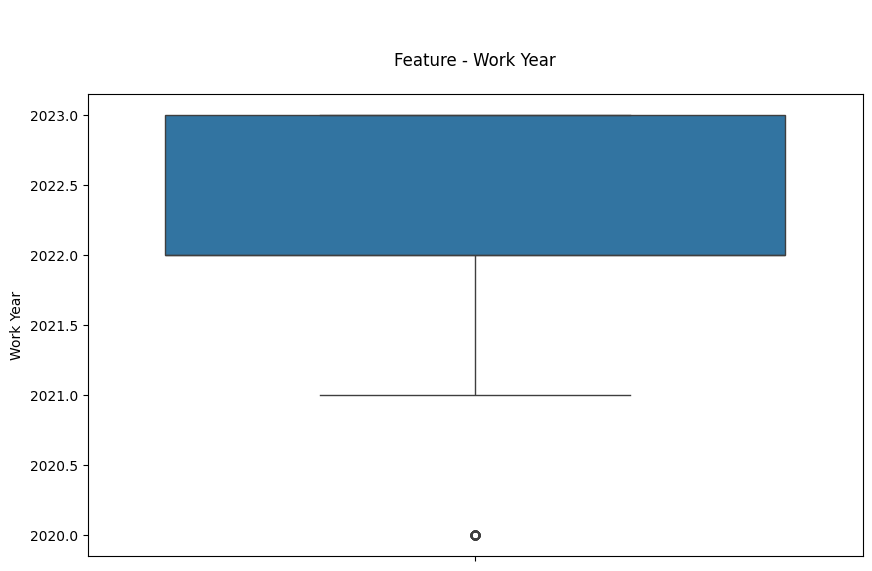




---------------------------------------------------------------------------------------------------


Feature - Salary In Usd



Data shape before outlier removal: (3755, 9)




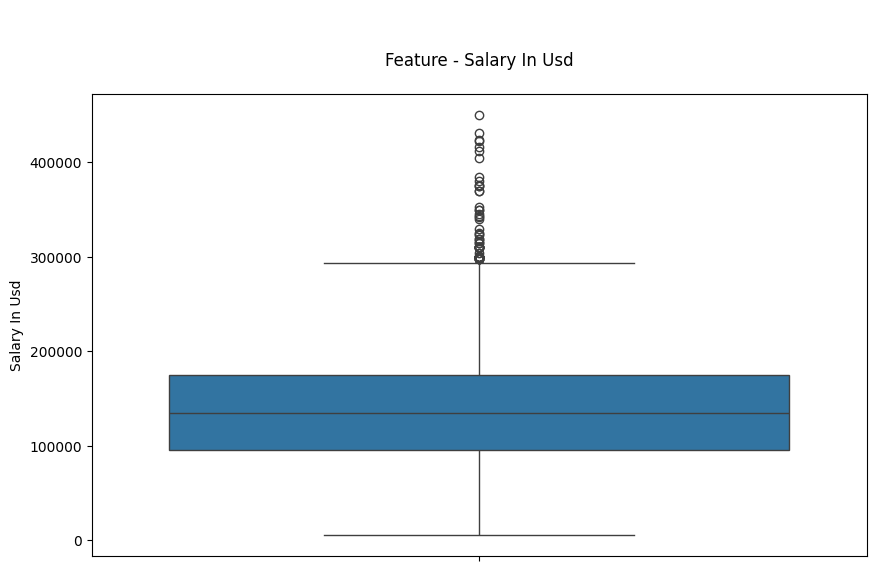

In [ ]:
numerical_fr = ["work_year", "salary_in_usd"]

for col in numerical_fr:
    print("---------------------------------------------------------------------------------------------------")
    print(f"\n\nFeature - {formatTitle(col)}\n")
    print(f"\n\nData shape before outlier removal: {data.shape}\n\n")
    plt.figure(figsize=(10, 6))
    plt.title(f"\n\nFeature - {formatTitle(col)}\n")
    sns.boxplot(y=data[col])
    plt.xlabel('')
    plt.ylabel(formatTitle(col))
    plt.show()
    print("\n\n")



#####**4.2   Define a methods to calculate Q1, Q3 ,IQR , lower limit,upper limit & remove outliers**

---


In [ ]:
def cal_q1_q3(data_f, column):
    Q1 = data_f[column].quantile(0.25)  # first quatile
    Q3 = data_f[column].quantile(0.75)  # third quatile
    return Q1, Q3

def cal_iqr(data_f, column):
    Q1, Q3 = cal_q1_q3(data_f, column)
    IQR = Q3 - Q1  # Interquartile range
    return IQR

def cal_lower_upper(data_f, column):
    Q1, Q3 = cal_q1_q3(data_f, column)
    IQR = cal_iqr(data_f, column)
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit
    return lower_bound, upper_bound

def removeOutliers(data_f, column):
    lower_bound, upper_bound = cal_lower_upper(data_f, column)
    filtered_data = data_f[(data_f[column] >= lower_bound) & (data_f[column] <= upper_bound)]
    return filtered_data


#####**4.3  Find outliers using lower limit and upper limit & remove them using above implemented methods**

---



Data shape after outlier removal: (3679, 9)




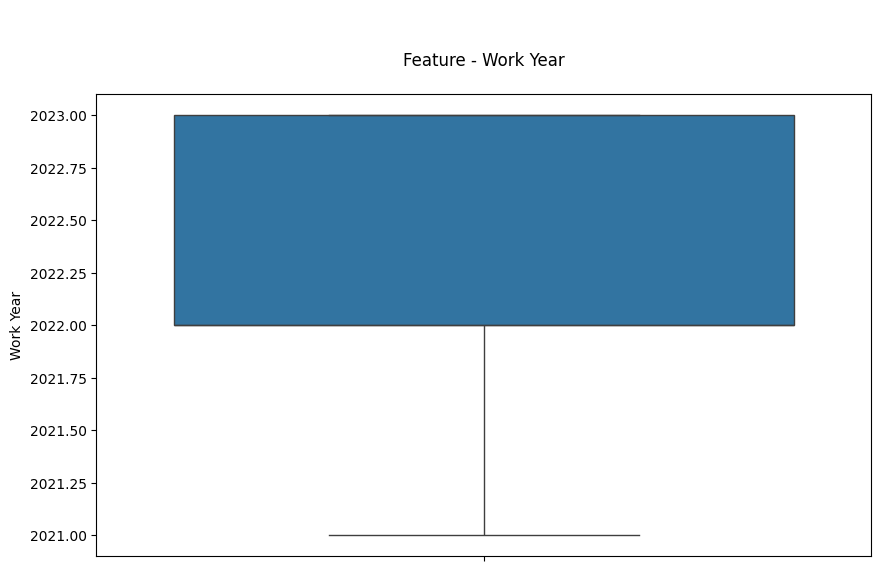






Data shape after outlier removal: (3619, 9)




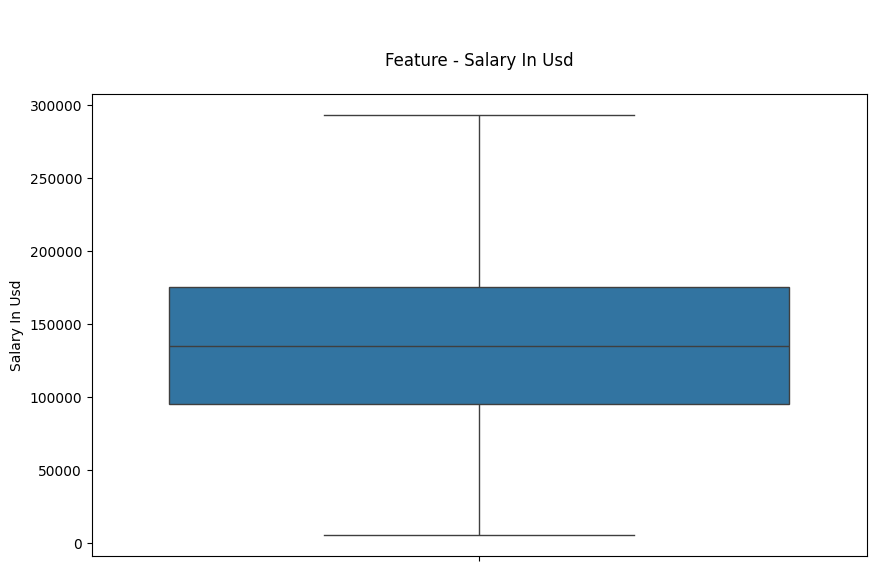

In [ ]:

for col in numerical_fr:
  data = removeOutliers(data, col)
  print(f"\n\nData shape after outlier removal: {data.shape}\n\n")
  plt.figure(figsize=(10, 6))
  plt.title(f"\n\nFeature - {formatTitle(col)}\n")
  sns.boxplot(y=data[col])
  plt.ylabel(formatTitle(col))
  plt.show()
  print("\n\n")



### **5. Feature selection or feature extraction as demanded by the data**

##### **5.1 Split Data set in to Train and Test Data**


---



Since feature selection should be done only to the training data set, we need to split data into test and train data. The reason to use feature selection only to the  training data set is to prevent the data leakage. Which means test data should be untouched. Model should not have seen any pattern or data in test data. If feature selection happens before data split, some amount of test data might have participated in feature selection, which is giving a clue to the model to predict. So it is always better to use feature selection on training dataset and then use selected features in model testing as well.
Moreover, need to use an encoder to convert each categorical data into numerical format so that the model use for Recursive Feature Elimination & prediction models can understand them well.


**For categorical features which have few levels, label encoding will be used, for features with high number of levels, frequency encoding will be used & for ordinal categories ordinal encoding will be used.**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cate_columns = data.select_dtypes(include=['object']).columns
data_set_fr_selection = data

fr_en_cate_columns = ["employee_residence","company_location","job_title","employment_type"]
label_en_cate_columns = ["remote_ratio"]

experience_order = ['EN', 'MI', 'SE', 'EX']
company_size_order = ['S', 'M', 'L']


#label encoding categorical features -low cardinality
label_encoders = {}
for fr in label_en_cate_columns:
    label_en = LabelEncoder()
    data_set_fr_selection[fr] = label_en.fit_transform(data_set_fr_selection[fr])
    label_encoders[fr] = label_en


#frequancy/count encoding categorical features - high cardinality
for fr in fr_en_cate_columns:
    data_set_fr_selection[fr] = data_set_fr_selection[fr].map(data_set_fr_selection[fr].value_counts())


#ordinal encoding categorical features - ordinal
ordinal_encoder = OrdinalEncoder(categories=[experience_order, company_size_order])

data_set_fr_selection[['experience_level', 'company_size']] = ordinal_encoder.fit_transform(
    data_set_fr_selection[['experience_level', 'company_size']]
)


data_set_fr_selection.shape, data_set_fr_selection.columns[:10]

x= data_set_fr_selection.drop(columns=['salary_in_usd'])
y= data_set_fr_selection['salary_in_usd']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)



In [ ]:
print(f"Features Shape: {x_train.shape}")
print(f"Target Shape: {y_train.shape}")


Features Shape: (2895, 8)
Target Shape: (2895,)


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor


#standardize features for Lasso
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled  = pd.DataFrame(x_test_scaled,  columns=x_test.columns)

#apply Lasso for feature importance
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0],cv=5, random_state=42).fit(x_train_scaled, y_train)
lasso_importance = np.abs(lasso.coef_)

#combine feature importance results
feature_importance_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Lasso_Importance": lasso_importance,
}).sort_values(by="Lasso_Importance", ascending=False)



import_features = feature_importance_df.head(8)["Feature"]

print("Importatnt Features ", import_features)

feature_importance_df

Importatnt Features  1      experience_level
3             job_title
0             work_year
6          company_size
7          remote_ratio
4    employee_residence
5      company_location
2       employment_type
Name: Feature, dtype: object


,Feature,Lasso_Importance
1,experience_level,26155.613049
3,job_title,9093.686719
0,work_year,8123.025602
6,company_size,7085.416207
7,remote_ratio,760.895455
4,employee_residence,13.238541
5,company_location,6.667494
2,employment_type,6.370356


#####**5.2 Feature selection of Training Data**


---



In [ ]:
#get selected features for model train
selected_x_train = pd.DataFrame(x_train_scaled[import_features])

#get selected features for model test
selected_x_test = pd.DataFrame(x_test_scaled[import_features])


### **6. Normalization**

Since only left numerical values is work_year and in above section we used robust scaler for traning data before use lasso for feature selection. So in this section a normalization will not be done for traning data.

###**7. ML models**

In [ ]:
print(f"Features Shape: {selected_x_train.shape}")
print(f"Target Shape: {y_train.shape}")


Features Shape: (2895, 8)
Target Shape: (2895,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

# Initialize and train Random Forest model
rf_regressor = RandomForestRegressor( random_state=42,
                                         n_estimators=1000,  max_depth=80,
                                       max_features=0.8,
    min_samples_split=10,)

rf_regressor.fit(selected_x_train, y_train)

# Predict on test data
y_pred = rf_regressor.predict(selected_x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest Regression MAE: {mae:.2f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R2 is", r2)
print(f"RMSE is",rmse)
mean_salary = y_train.mean()
print(f"Mean Salary: ${mean_salary:,.2f}")

percentage_error = (mae / mean_salary) * 100
print(f"MAE as Percentage of Mean Salary: {percentage_error:.2f}%")


Random Forest Regression MAE: 34126.64
R2 is 0.4450908488990012
RMSE is 43608.42748070962
Mean Salary: $135,182.08
MAE as Percentage of Mean Salary: 25.24%


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


# Convert data to DMatrix (XGBoost's internal format)
dtrain = xgb.DMatrix(selected_x_train, label=y_train)
dtest = xgb.DMatrix(selected_x_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,  # Increase max_depth to capture more complexity
    'eta': 0.05,  # Lower learning rate
    'silent': 1,
    'subsample': 0.9,  # Slightly reduce subsample rate
    'colsample_bytree': 0.8,  # Slightly reduce column sample rate
    'min_child_weight': 5,  # Higher min_child_weight to reduce overfitting
    'lambda': 5,  # Add L2 regularization
    'alpha': 5 # Add L1 regularization
}

watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Train XGBoost model
model = xgb.train(params, dtrain, num_boost_round=1000,evals=watchlist, early_stopping_rounds=50)

# Predict on test data
y_pred_x = model.predict(dtest)

# Evaluate the model
mae_x = mean_absolute_error(y_test, y_pred_x)
print(f"XGBoost Regression MAE: {mae_x:.4f}")

rmse_x = np.sqrt(mean_squared_error(y_test, y_pred_x))
r2_x = r2_score(y_test, y_pred)

print(f"R2 is", r2_x)
print(f"RMSE is",rmse_x)
mean_salary = y_train.mean()
print(f"Mean Salary: ${mean_salary:,.2f}")

percentage_error_x = (mae_x / mean_salary) * 100
print(f"MAE as Percentage of Mean Salary: {percentage_error_x:.2f}%")


[0]	train-rmse:56103.80329	test-rmse:57421.98002
[1]	train-rmse:55164.72040	test-rmse:56471.60985
[2]	train-rmse:54298.00440	test-rmse:55602.06236
[3]	train-rmse:53359.44683	test-rmse:54698.64496
[4]	train-rmse:52605.03190	test-rmse:53960.68312
[5]	train-rmse:51877.45979	test-rmse:53280.18353


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:26:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:51204.69268	test-rmse:52674.81617
[7]	train-rmse:50565.18057	test-rmse:52090.48676
[8]	train-rmse:49989.99397	test-rmse:51542.68893
[9]	train-rmse:49448.87380	test-rmse:51098.17846
[10]	train-rmse:48877.92299	test-rmse:50555.73034
[11]	train-rmse:48391.47446	test-rmse:50108.93567
[12]	train-rmse:47874.60304	test-rmse:49623.34362
[13]	train-rmse:47485.44248	test-rmse:49236.27368
[14]	train-rmse:47050.74651	test-rmse:48810.61712
[15]	train-rmse:46642.94890	test-rmse:48408.45121
[16]	train-rmse:46276.33290	test-rmse:48059.92689
[17]	train-rmse:45927.79471	test-rmse:47741.80569
[18]	train-rmse:45611.40275	test-rmse:47465.58515
[19]	train-rmse:45343.61557	test-rmse:47250.59062
[20]	train-rmse:45078.99025	test-rmse:46996.36126
[21]	train-rmse:44866.85729	test-rmse:46802.32243
[22]	train-rmse:44645.10967	test-rmse:46615.53394
[23]	train-rmse:44439.68458	test-rmse:46437.66000
[24]	train-rmse:44234.63842	test-rmse:46249.80013
[25]	train-rmse:44036.61303	test-rmse:46096.22239
[26]



Random Forest & Xboost Evaluation Metrics - Table view


,Random Forest,Xboost
MAE,34126.640791,34128.683594
RMSE,43608.427481,43470.906133
R2,0.445091,0.445091
Percetage of Error,25.244944,25.246455




Random Forest & Xboost Evaluation Metrics - Bar graph view


<Axes: >

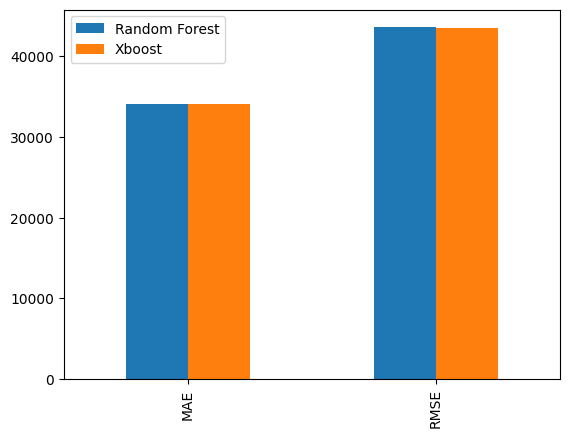

In [ ]:
print("\n\nRandom Forest & Xboost Evaluation Metrics - Table view")
display(pd.DataFrame({'Random Forest' :[mae,rmse,r2,percentage_error],'Xboost':[mae_x,rmse_x,r2_x,percentage_error_x]}, index =['MAE', 'RMSE','R2','Percetage of Error']))

print("\n\nRandom Forest & Xboost Evaluation Metrics - Bar graph view")
display(pd.DataFrame({'Random Forest' :[mae,rmse],'Xboost':[mae_x,rmse_x]}, index =['MAE', 'RMSE']).plot(kind='bar'))




Random Forest & Xboost Evaluation Metrics(R2) - Bar graph view


<Axes: >

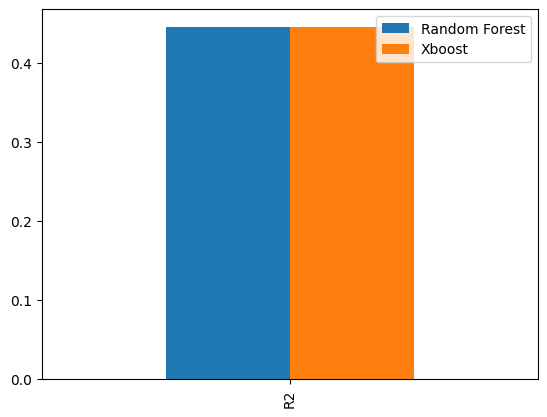

In [ ]:
print("\n\nRandom Forest & Xboost Evaluation Metrics(R2) - Bar graph view")
display(pd.DataFrame({'Random Forest' :[r2],'Xboost':[r2_x]}, index =['R2']).plot(kind='bar'))